In [1]:
#future is the missing compatibility layer between Python 2 and Python 3. 
#It allows you to use a single, clean Python 3.x-compatible codebase to 
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
#encoding. word encodig
import codecs
#finds all pathnames matching a pattern, like regex
import glob
#log events for libraries
import logging
#concurrency
import multiprocessing
#dealing with operating system , like reading file
import os
#pretty print, human readable
import pprint
#regular expressions
import re

In [3]:
#natural language toolkit
import nltk
#word 2 vec
import gensim.models.word2vec as w2v
#dimensionality reduction
import sklearn.manifold
#math
import numpy as np
#plotting
import matplotlib.pyplot as plt
#parse dataset
import pandas as pd
#visualization
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#stopwords like the at a an, unnecesasry
#tokenization into sentences, punkt 
#http://www.nltk.org/
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /home/pavankoushik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pavankoushik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#get the book names, matching txt file
book_filenames = sorted(glob.glob("data/*.txt"))

In [7]:
#print books
print("Found books:")
book_filenames

Found books:


['data/mahabharath_vol1.txt',
 'data/mahabharath_vol3.txt',
 'data/mahabharath_vol4.txt',
 'data/mahaharath_vol2.txt']

In [8]:
#step 1 process data

#initialize rawunicode , we'll add all text to this one bigass file in memory
corpus_raw = u""
#for each book, read it, open it un utf 8 format, 
#add it to the raw corpus
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'data/mahabharath_vol1.txt'...
Corpus is now 3703501 characters long

Reading 'data/mahabharath_vol3.txt'...
Corpus is now 7680993 characters long

Reading 'data/mahabharath_vol4.txt'...
Corpus is now 8476500 characters long

Reading 'data/mahaharath_vol2.txt'...
Corpus is now 9356708 characters long



In [9]:
#tokenizastion! saved the trained model here
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [10]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [11]:
#convert into list of words
#remove unecessary characters, split into words, no hyhens and shit
#split into words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [12]:
#for each sentece, sentences where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [13]:
#print an example
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

That being so, his chief duty is to represent so far as practicable the manner in which his author’s ideas have been expressed, retaining if possible at the sacrifice of idiom and taste all the peculiarities of his author’s imagery and of language as well.
['That', 'being', 'so', 'his', 'chief', 'duty', 'is', 'to', 'represent', 'so', 'far', 'as', 'practicable', 'the', 'manner', 'in', 'which', 'his', 'author', 's', 'ideas', 'have', 'been', 'expressed', 'retaining', 'if', 'possible', 'at', 'the', 'sacrifice', 'of', 'idiom', 'and', 'taste', 'all', 'the', 'peculiarities', 'of', 'his', 'author', 's', 'imagery', 'and', 'of', 'language', 'as', 'well']


In [14]:
#count tokens, each one being a sentence
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,619,081 tokens


In [15]:
#step 2 build our model, another one is Glove
#define hyperparameters

# Dimensionality of the resulting word vectors.
#more dimensions mean more traiig them, but more generalized
num_features = 300

#
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()
print(num_workers)

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#rate 0 and 1e-5 
#how often to use
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

4


In [16]:
w2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [17]:
w2vec.build_vocab(sentences)
print(w2vec.wv.vocab)

{'multitudes': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609198>, 'solicitation': <gensim.models.keyedvectors.Vocab object at 0x7f5e05511048>, 'Infinite': <gensim.models.keyedvectors.Vocab object at 0x7f5e056091d0>, 'comers': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609278>, 'bar': <gensim.models.keyedvectors.Vocab object at 0x7f5e0550ffd0>, 'grieved': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609438>, 'appointed': <gensim.models.keyedvectors.Vocab object at 0x7f5e056093c8>, 'surnamed': <gensim.models.keyedvectors.Vocab object at 0x7f5e05511128>, 'whirl': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609358>, 'happy': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609320>, 'Dark': <gensim.models.keyedvectors.Vocab object at 0x7f5e056095c0>, 'respect': <gensim.models.keyedvectors.Vocab object at 0x7f5e05609588>, 'Raivata': <gensim.models.keyedvectors.Vocab object at 0x7f5e05511198>, 'limited': <gensim.models.keyedvectors.Vocab object at 0x7f5e05

In [18]:
print("Word2Vec vocabulary length:", len(w2vec.wv.vocab))

Word2Vec vocabulary length: 13829


In [19]:
#train model on sentneces
w2vec.train(sentences,total_examples = len(w2vec.wv.vocab),epochs=10)

(11977299, 16190810)

In [20]:
#save model
if not os.path.exists("trained"):
    os.makedirs("trained")

In [21]:
w2vec.save(os.path.join("trained", "thrones2vec.w2v"))

In [22]:
#load model
w2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

In [23]:
#squash dimensionality to 2
#https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [24]:
#put it all into a giant matrix
all_word_vectors_matrix = w2vec.wv.syn0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [25]:
#train t sne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [26]:
#plot point in 2d space
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[w2vec.wv.vocab[word].index])
            for word in w2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [27]:
points.head(10)

,word,x,y
0,multitudes,9.059612,49.533989
1,solicitation,-30.490894,-39.821804
2,Infinite,21.748482,-22.685801
3,sorry,-27.762548,-11.250586
4,bar,-9.372774,-18.325636
5,grieved,-47.189465,17.547024
6,appointed,-24.136248,7.578159
7,surnamed,38.262733,-7.893205
8,whirl,8.846172,37.521446
9,happy,-25.998766,-11.852316


In [28]:
#plot
sns.set_context("poster")

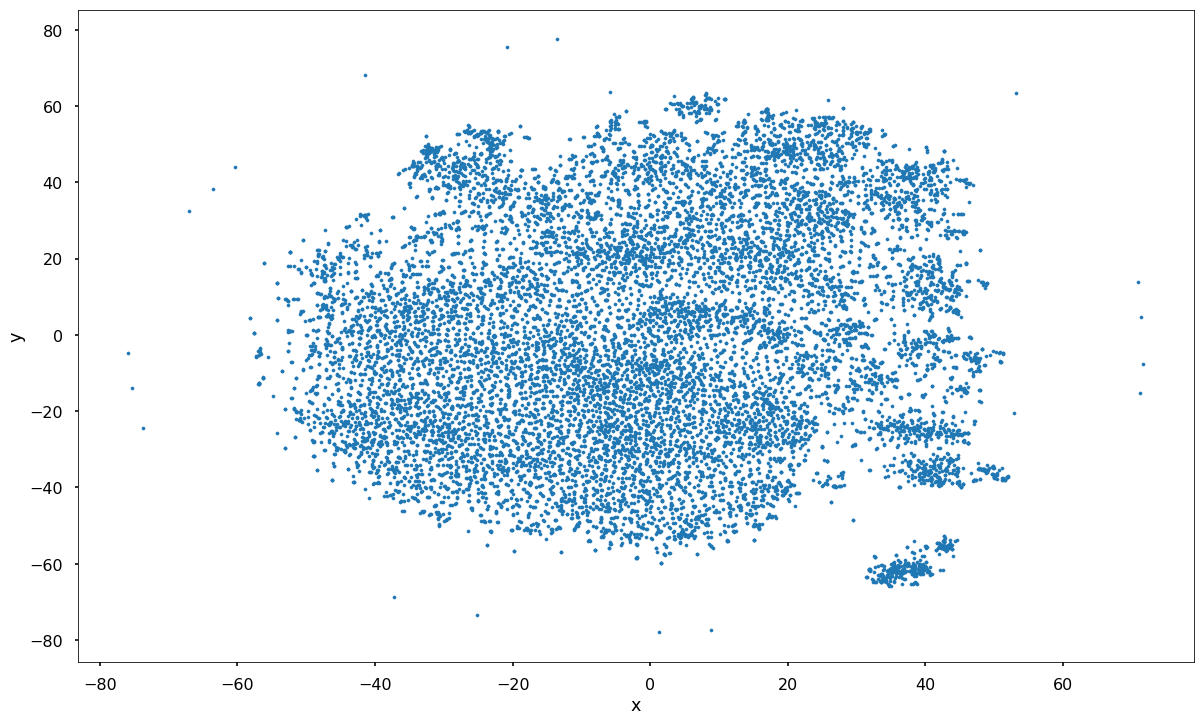

In [29]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [30]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

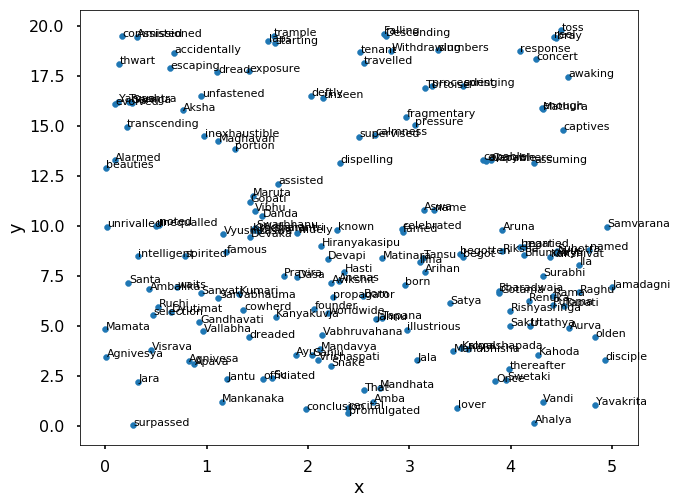

In [31]:
plot_region(x_bounds=(0, 5), y_bounds=(0.0, 20.0))

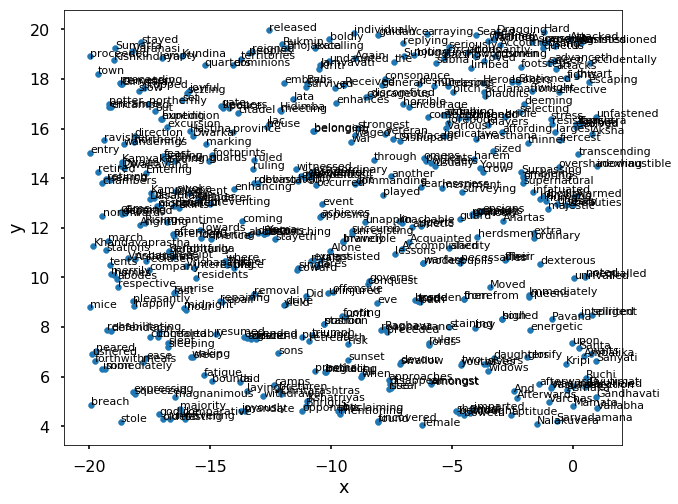

In [32]:
plot_region(x_bounds=(-20.0, 1), y_bounds=(4, 20))

In [33]:
w2vec.most_similar("Krishna")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Kesava', 0.5995445251464844),
 ('Vasudeva', 0.5874234437942505),
 ('Janardana', 0.5416519045829773),
 ('Balarama', 0.5126712322235107),
 ('Draupadi', 0.49605175852775574),
 ('forcible', 0.4913216829299927),
 ('Satyabhama', 0.4897524118423462),
 ('Devaki', 0.48169898986816406),
 ('Subhadra', 0.4712461829185486),
 ('Hrishikesa', 0.4681670069694519)]

In [34]:
w2vec.most_similar("A")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('An', 0.6148645877838135),
 ('a', 0.5653588771820068),
 ('incurs', 0.5363098382949829),
 ('punished', 0.5312396883964539),
 ('serveth', 0.5273268818855286),
 ('unchaste', 0.5201036930084229),
 ('perpetrateth', 0.5112824440002441),
 ('alliances', 0.5073621273040771),
 ('Evil', 0.5042605400085449),
 ('Another', 0.5038903951644897)]

In [35]:
w2vec.most_similar("Pandavas")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Parthas', 0.5864061117172241),
 ('Kauravas', 0.5659199953079224),
 ('Srinjayas', 0.5571808218955994),
 ('Pandu', 0.5451391935348511),
 ('Somakas', 0.5307637453079224),
 ('Pandus', 0.5116721391677856),
 ('Panchalas', 0.5077418684959412),
 ('cousins', 0.5012275576591492),
 ('Ghoshayatra', 0.500887930393219),
 ('Dhartarashtras', 0.4960176646709442)]

In [42]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = w2vec.wv.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [43]:
nearest_similarity_cosmul("Pandavas", "Kauravas", "Draupadi")


Pandavas is related to Kauravas, as Satyabhama is related to Draupadi


'Satyabhama'